# Análisis Exploratorio de datos

### Importación de librerías y módulos

In [42]:
# notebooks/exploration.ipynb

#Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Configurar estilo de gráficos
sns.set(style="whitegrid")

### Carga de datos

In [43]:
from src.data_preparation import load_data

train_data = load_data('data/TrainingDatasets/TREC-2017-LiveQA-Medical-Train-1.xml')

### Exploración básica de datos

In [44]:
# Mostrar las primeras filas del dataframe
train_data.head()

# Información general del dataframe
train_data.info()

# Estadísticas descriptivas
train_data.describe()

# Análisis de la distribución de las preguntas y respuestas
# Número de preguntas y sub-preguntas
num_questions = train_data['question_id'].nunique()
num_sub_questions = train_data['sub_question_id'].nunique()

print(f"Número de preguntas: {num_questions}")
print(f"Número de sub-preguntas: {num_sub_questions}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question_id      388 non-null    object
 1   subject          388 non-null    object
 2   message          388 non-null    object
 3   sub_question_id  388 non-null    object
 4   focus            388 non-null    object
 5   type             388 non-null    object
 6   answer_id        388 non-null    object
 7   answer           388 non-null    object
dtypes: object(8)
memory usage: 24.4+ KB
Número de preguntas: 200
Número de sub-preguntas: 254


### Distribución de respuestas por sub-pregunta

count    254.000000
mean       1.527559
std        1.087673
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
dtype: float64


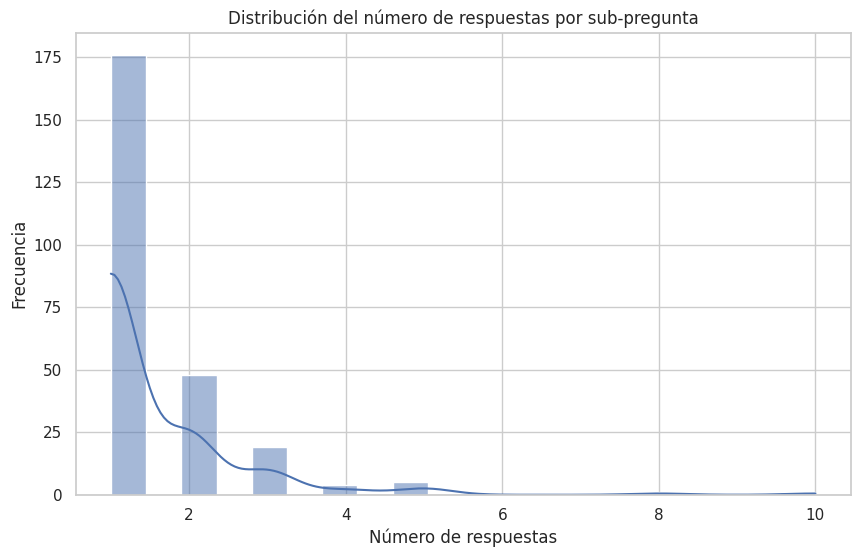

In [45]:
# Número de respuestas por sub-pregunta
num_answers_per_sub_question = train_data.groupby('sub_question_id').size()
print(num_answers_per_sub_question.describe())

# Visualización de la distribución de respuestas por sub-pregunta
plt.figure(figsize=(10, 6))
sns.histplot(num_answers_per_sub_question, bins=20, kde=True)
plt.title('Distribución del número de respuestas por sub-pregunta')
plt.xlabel('Número de respuestas')
plt.ylabel('Frecuencia')
plt.show()


La mayoría de las preguntas tienen múltiples respuestas, lo cual sugiere que hay una variedad de respuestas disponibles para cada pregunta. Esto es importante para nuestro objetivo de predecir la mejor respuesta, ya que proporciona múltiples opciones para seleccionar.

### Distribución de temas y enfoques

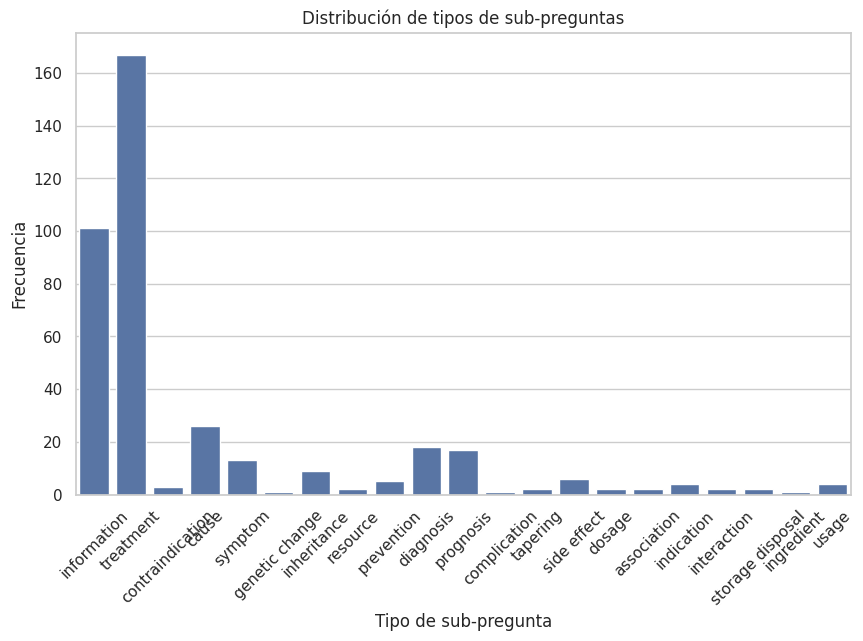

In [46]:
# Análisis de temas y enfoques
# Distribución de los tipos de sub-preguntas
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='type')
plt.title('Distribución de tipos de sub-preguntas')
plt.xlabel('Tipo de sub-pregunta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

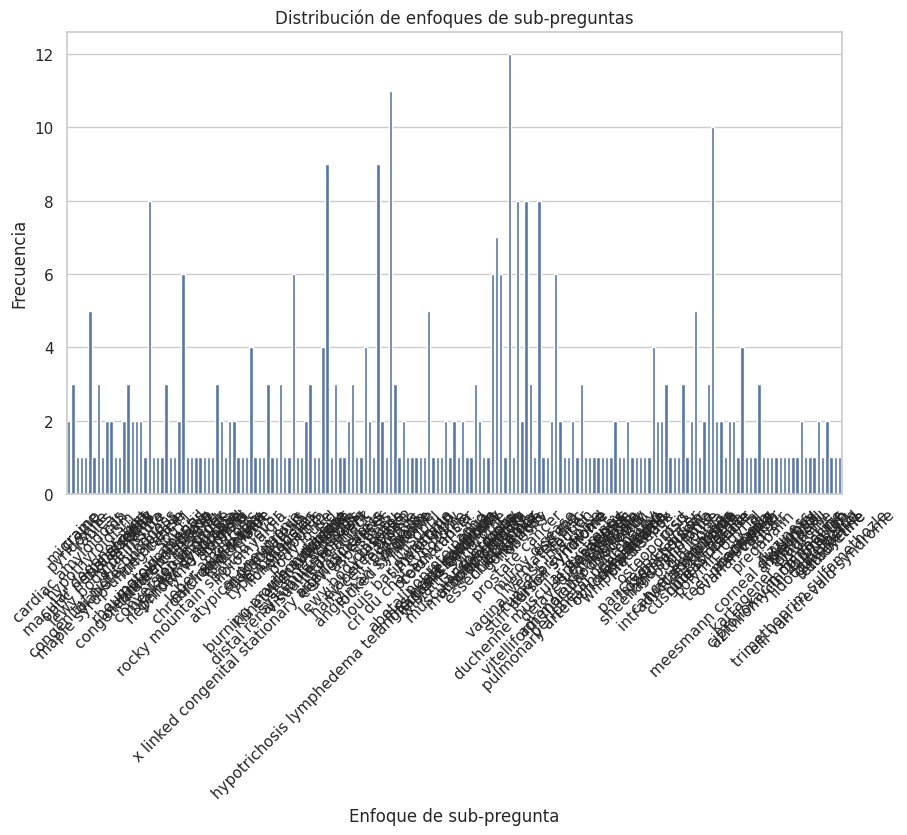

In [47]:
# Distribución de los enfoques de las sub-preguntas
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='focus')
plt.title('Distribución de enfoques de sub-preguntas')
plt.xlabel('Enfoque de sub-pregunta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### Longitud de preguntas y respuestas

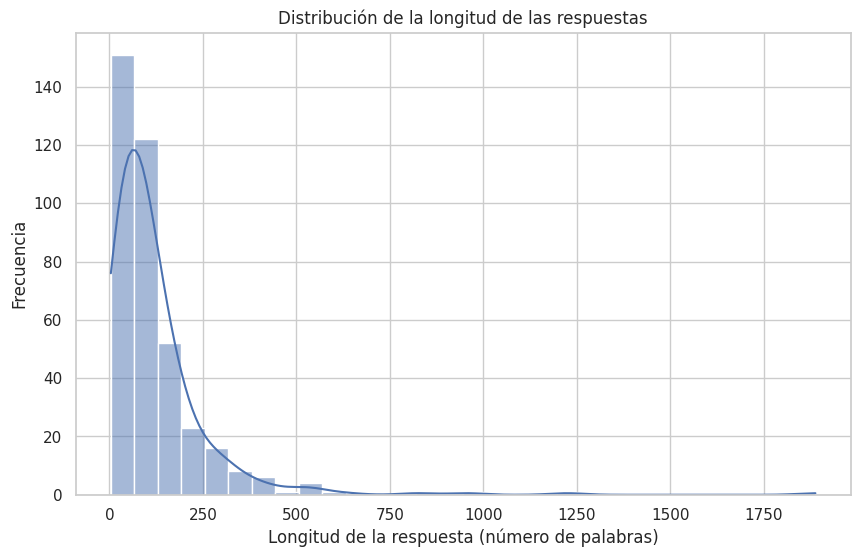

In [48]:
# Calcular la longitud de las respuestas
train_data['answer_length'] = train_data['answer'].apply(lambda x: len(x.split()))

# Distribución de la longitud de las respuestas
plt.figure(figsize=(10, 6))
sns.histplot(train_data['answer_length'], bins=30, kde=True)
plt.title('Distribución de la longitud de las respuestas')
plt.xlabel('Longitud de la respuesta (número de palabras)')
plt.ylabel('Frecuencia')
plt.show()

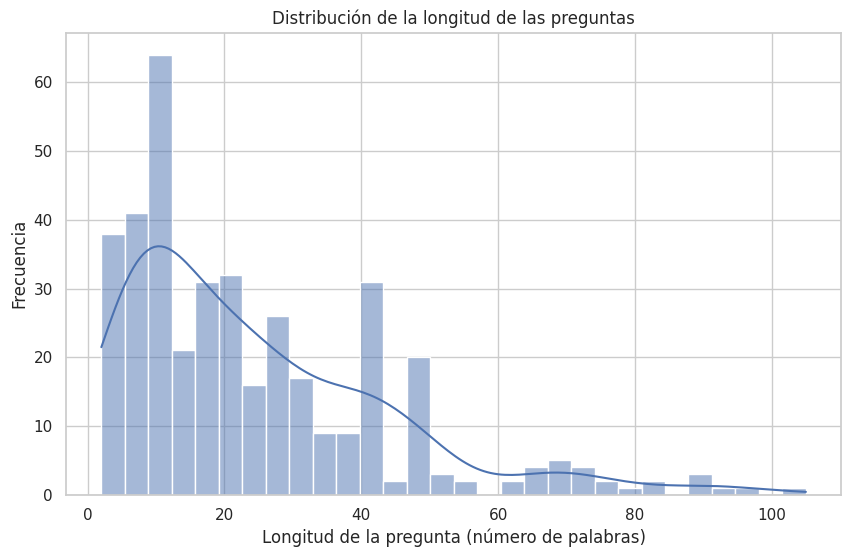

In [49]:
# Paso 10: Longitud de preguntas y sub-preguntas
# Calcular la longitud de las preguntas y sub-preguntas
train_data['question_length'] = train_data['message'].apply(lambda x: len(x.split()))

# Distribución de la longitud de las preguntas
plt.figure(figsize=(10, 6))
sns.histplot(train_data['question_length'], bins=30, kde=True)
plt.title('Distribución de la longitud de las preguntas')
plt.xlabel('Longitud de la pregunta (número de palabras)')
plt.ylabel('Frecuencia')
plt.show()

Las respuestas y preguntas varían en longitud, con una distribución que parece seguir una curva normal (respuestas). Las respuestas más largas podrían contener explicaciones más detalladas, lo cual podría ser un indicador de calidad en algunas situaciones.

### Correlación entre la longitud de preguntas y respuestas

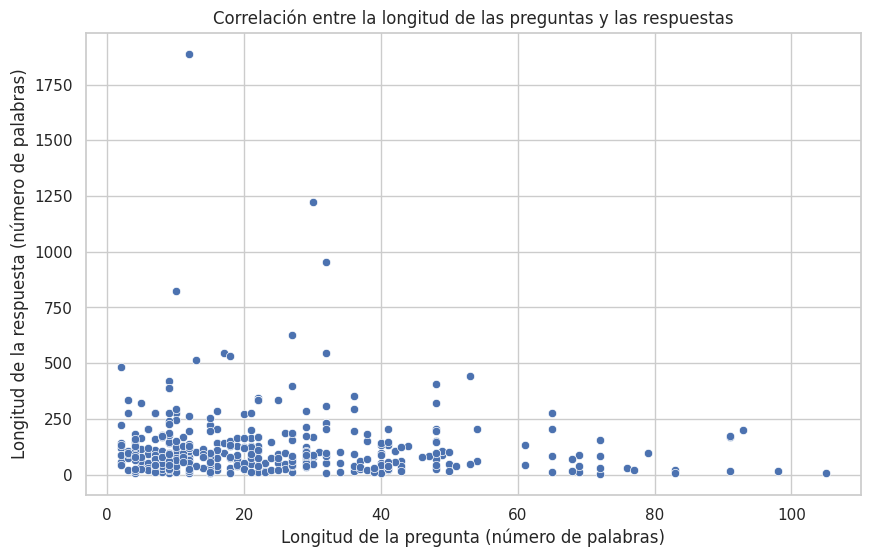

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='question_length', y='answer_length')
plt.title('Correlación entre la longitud de las preguntas y las respuestas')
plt.xlabel('Longitud de la pregunta (número de palabras)')
plt.ylabel('Longitud de la respuesta (número de palabras)')
plt.show()

Existe una correlación positiva entre la longitud de la pregunta y la longitud de la respuesta, aunque no es muy fuerte. Esto sugiere que preguntas más detalladas tienden a recibir respuestas más largas, pero hay otros factores que también influyen en la longitud de la respuesta.

### Análisis de frecuencia en preguntas y respuestas

In [51]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [52]:
# Unir todas las preguntas y respuestas en un solo texto
all_questions_text = ' '.join(train_data['message'].dropna().tolist())
all_answers_text = ' '.join(train_data['answer'].dropna().tolist())

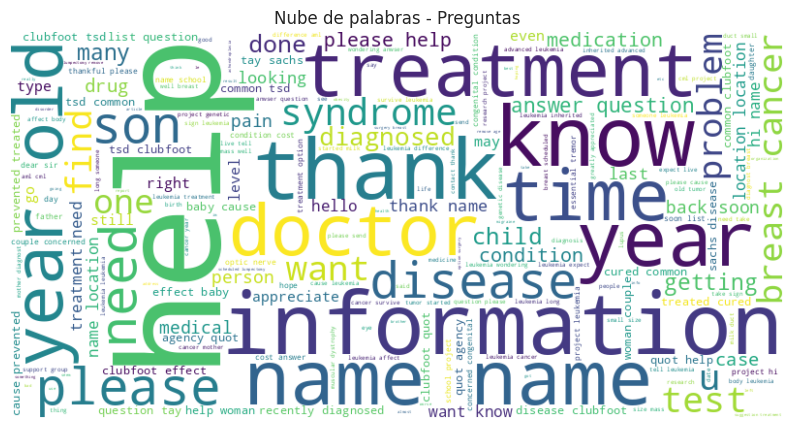

In [53]:
# Nube de palabras para preguntas
plot_wordcloud(all_questions_text, 'Nube de palabras - Preguntas')

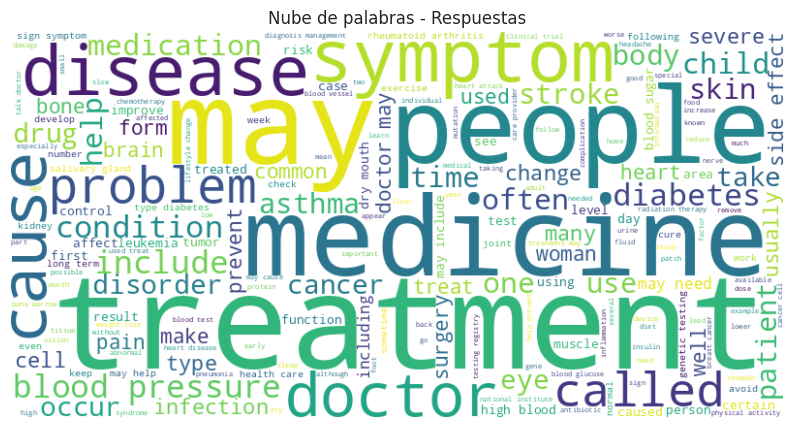

In [28]:
# Nube de palabras para respuestas
plot_wordcloud(all_answers_text, 'Nube de palabras - Respuestas')

Las palabras más comunes en las preguntas y respuestas están relacionadas con temas médicos, lo cual es coherente con el dominio de los datos. Esto confirma que los datos son relevantes para nuestro objetivo.

### Diversidad léxica

In [54]:
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

train_data['question_lexical_diversity'] = train_data['message'].apply(lambda x: lexical_diversity(x) if isinstance(x, str) else 0)
train_data['answer_lexical_diversity'] = train_data['answer'].apply(lambda x: lexical_diversity(x) if isinstance(x, str) else 0)

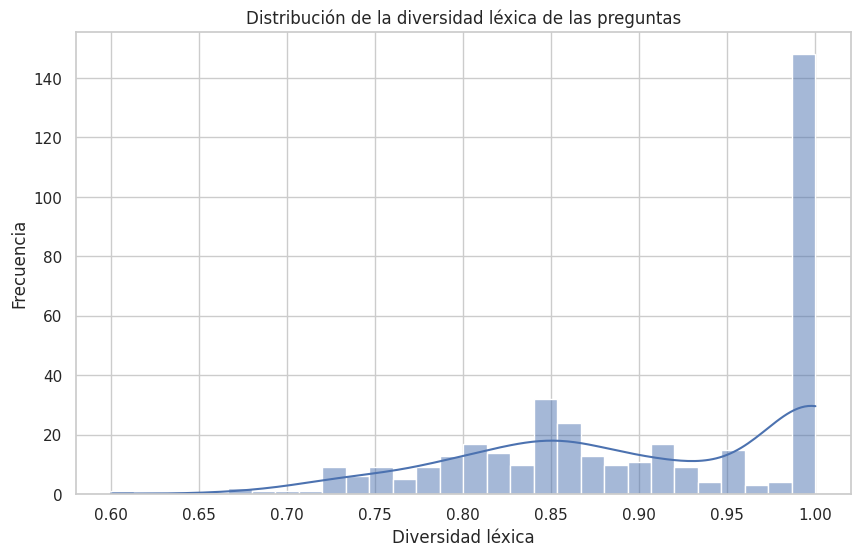

In [55]:
# Distribución de la diversidad léxica de las preguntas
plt.figure(figsize=(10, 6))
sns.histplot(train_data['question_lexical_diversity'], bins=30, kde=True)
plt.title('Distribución de la diversidad léxica de las preguntas')
plt.xlabel('Diversidad léxica')
plt.ylabel('Frecuencia')
plt.show()

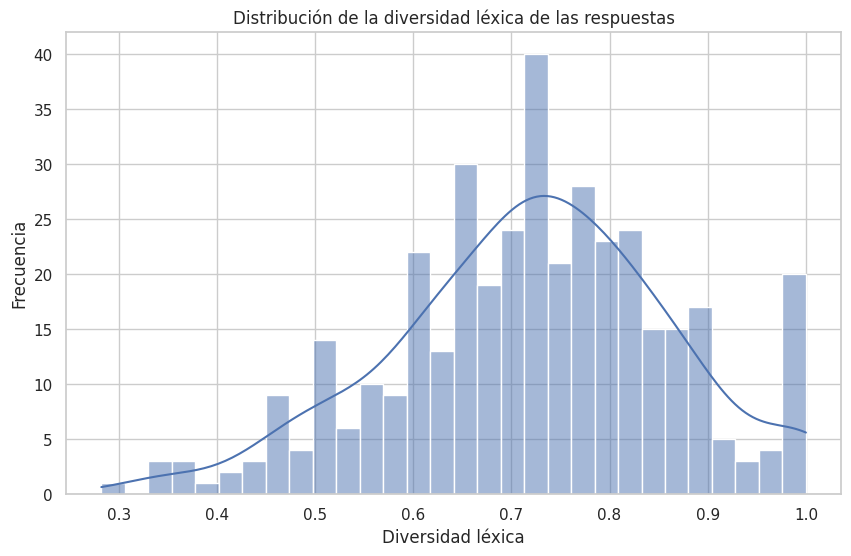

In [56]:
# Distribución de la diversidad léxica de las respuestas
plt.figure(figsize=(10, 6))
sns.histplot(train_data['answer_lexical_diversity'], bins=30, kde=True)
plt.title('Distribución de la diversidad léxica de las respuestas')
plt.xlabel('Diversidad léxica')
plt.ylabel('Frecuencia')
plt.show()

### Análisis de duplicados

In [57]:
# Paso 15: Análisis de duplicados
duplicated_questions = train_data[train_data.duplicated(subset=['message'], keep=False)]
duplicated_answers = train_data[train_data.duplicated(subset=['answer'], keep=False)]

print(f"Preguntas duplicadas: {len(duplicated_questions)}")
print(f"Respuestas duplicadas: {len(duplicated_answers)}")

Preguntas duplicadas: 275
Respuestas duplicadas: 41
